In [2]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))


import pandas as pd
from hydra.model.force_encoder_ecto import ForceEncoderEcto
from hydra.model.force_encoder_endo import ForceEncoderEndo
import hydra.model.helper as helper

In [3]:
NUMX = 30
NUMY = 60

In [4]:
# Load calcium
FILENAME = "2020-08-14-22-39-05-658838"
encoder = ForceEncoderEndo

calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), NUMX*2, NUMY)

In [5]:
# Separate ecto and endo
ca_ecto = calcium[:, :NUMX, :]
ca_endo = calcium[:, NUMX:, :]

In [6]:
# Encode force
NAME = "2020-08-14-22-39-05-658838"

fo_ecto = helper.encode_force_2d(ForceEncoderEcto, ca_ecto, NUMX, NUMY, 0.02, save_interval=5)
fo_endo = helper.encode_force_2d(ForceEncoderEndo, ca_endo, NUMX, NUMY, 0.02, save_interval=5)

100%|██████████████████████████████████████████████████████████████████████████| 17500/17500 [00:03<00:00, 4660.31it/s]


In [7]:
# Average force and save
fo_ecto_avg = helper.average_force(fo_ecto, NUMX, NUMY, 10, 20)
df = pd.DataFrame(fo_ecto_avg.reshape(-1, 200))
df.to_csv("./results/data/force/" + NAME + "_k7ecto03endo0015_ecto.csv", index = False)

fo_endo_avg = helper.average_force(fo_endo, NUMX, NUMY, 10, 20)
df = pd.DataFrame(fo_endo_avg.reshape(-1, 200))
df.to_csv("./results/data/force/" + NAME + "_k7ecto03endo0015_endo.csv", index = False)

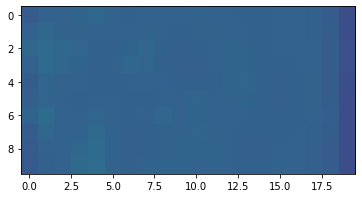

In [8]:
# Load to double check / compare
fo = pd.read_csv("./results/data/force/" + NAME + "_k7ecto03endo0015_ecto" + ".csv")
fo = fo.values.reshape(-1, 10, 20)
plt.imshow(fo[100], vmin=0, vmax=4)

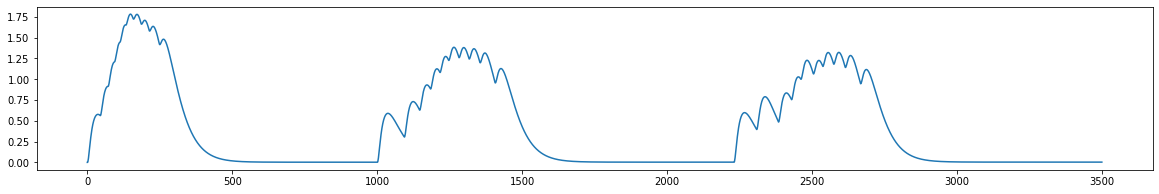

In [9]:
plt.figure(figsize=(20,3))
plt.plot(fo[:, 5, 10])
plt.show()

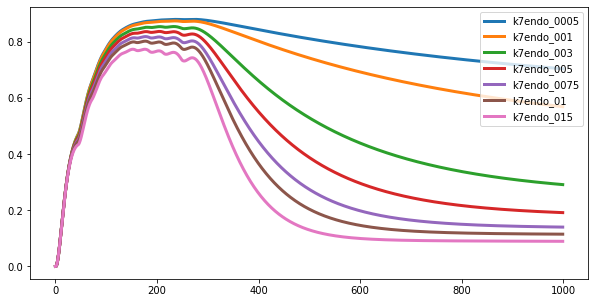

In [44]:
plt.figure(figsize=(10,5))
names = ["k7endo_0005", "k7endo_001", "k7endo_003", "k7endo_005", "k7endo_0075", "k7endo_01", "k7endo_015"]
for name in names:
    fo = pd.read_csv("./results/data/force/" + name + "_endo" + ".csv")
    fo = fo.values.reshape(-1, 10, 20)
    plt.plot(fo[:, 5, 10], label=name, linewidth=3)
plt.legend(loc="upper right")
plt.show()

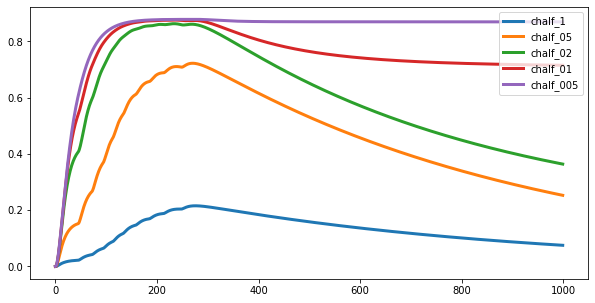

In [45]:
plt.figure(figsize=(10,5))
names = ["chalf_1", "chalf_05", "chalf_02", "chalf_01", "chalf_005"]
for name in names:
    fo = pd.read_csv("./results/data/force/" + name + "_endo" + ".csv")
    fo = fo.values.reshape(-1, 10, 20)
    plt.plot(fo[:, 5, 10], label=name, linewidth=3)
plt.legend(loc="upper right")
plt.show()